In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
pd.set_option('display.precision',1)

In [114]:
vgsales = pd.read_csv('vgsales.csv')
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.5,29.0,3.8,8.5,82.7
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.1,3.6,6.8,0.8,40.2
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.8,12.9,3.8,3.3,35.8
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.8,11.0,3.3,3.0,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.3,8.9,10.2,1.0,31.4


In [115]:
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,1.0e-02,0.0e+00,0.0,0.0,1.0e-02
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,1.0e-02,0.0e+00,0.0,0.0,1.0e-02
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0e+00,0.0e+00,0.0,0.0,1.0e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.0e+00,1.0e-02,0.0,0.0,1.0e-02
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,1.0e-02,0.0e+00,0.0,0.0,1.0e-02


In [116]:
# handle missing values
vgsales.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [117]:
# delete missing values
vgsales.dropna(how='any',inplace = True)
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.5,29.0,3.8,8.5,82.7
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.1,3.6,6.8,0.8,40.2
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.8,12.9,3.8,3.3,35.8
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.8,11.0,3.3,3.0,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.3,8.9,10.2,1.0,31.4


In [118]:
vgsales['Year'] = vgsales['Year'].astype(int)
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.5,29.0,3.8,8.5,82.7
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.1,3.6,6.8,0.8,40.2
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.8,12.9,3.8,3.3,35.8
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.8,11.0,3.3,3.0,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.3,8.9,10.2,1.0,31.4


In [119]:
vgsales.describe(include=['object'])

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


### 1. 1980 - 2020 电子游戏行业发展趋势

In [120]:
sales = vgsales.loc[:,['Year','EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales']]
sales.head()

,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006,29.0,41.5,3.8,8.5,82.7
1,1985,3.6,29.1,6.8,0.8,40.2
2,2008,12.9,15.8,3.8,3.3,35.8
3,2009,11.0,15.8,3.3,3.0,33.0
4,1996,8.9,11.3,10.2,1.0,31.4


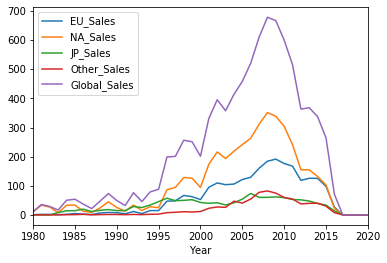

In [121]:
sales.groupby('Year').agg(np.sum).plot(kind = 'line')

In [122]:
sales_pic = sales.groupby('Year').agg(np.sum)
sales_pic.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='Year')

In [123]:
sales_pic.index.name='Year'
sales_pic.reset_index(inplace= True)
sales_pic.head()

,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,0.7,10.6,0.0,0.1,11.4
1,1981,2.0,33.4,0.0,0.3,35.8
2,1982,1.7,26.9,0.0,0.3,28.9
3,1983,0.8,7.8,8.1,0.1,16.8
4,1984,2.1,33.3,14.3,0.7,50.4


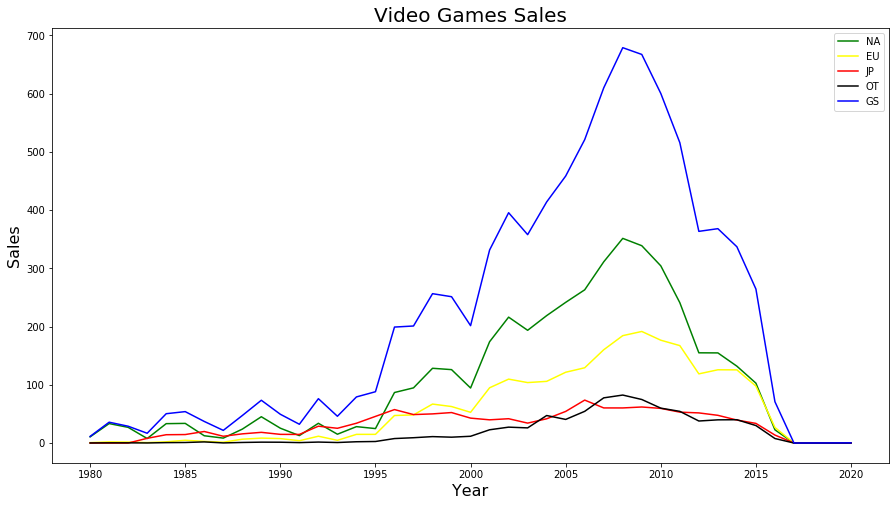

In [124]:
# 1. 1980 - 2020 电子游戏行业发展趋势
plt.figure(figsize=(15,8))
plt.plot(sales_pic['Year'],sales_pic['NA_Sales'],color = 'green')
plt.plot(sales_pic['Year'],sales_pic['EU_Sales'],color = 'yellow')
plt.plot(sales_pic['Year'],sales_pic['JP_Sales'],color = 'red')
plt.plot(sales_pic['Year'],sales_pic['Other_Sales'],color = 'k')
plt.plot(sales_pic['Year'],sales_pic['Global_Sales'],color = 'blue')
plt.title('Video Games Sales',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Sales',fontsize=16)
#plt.grid(True)
plt.legend(['NA','EU','JP','OT','GS'],loc='best')
plt.show()

### 2. 哪些公司发行的游戏更受玩家的喜爱 TOP10
#### 销量最高的发行商TOP10

In [125]:
#数据选取
pub = vgsales.loc[:,'Publisher' : 'Global_Sales']
pub.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.5,29.0,3.8,8.5,82.7
1,Nintendo,29.1,3.6,6.8,0.8,40.2
2,Nintendo,15.8,12.9,3.8,3.3,35.8
3,Nintendo,15.8,11.0,3.3,3.0,33.0
4,Nintendo,11.3,8.9,10.2,1.0,31.4


In [126]:
# number of publisher
pub.Publisher.nunique()

576

In [127]:
# total sales of each publisher in different region
pub_sales = pub.groupby('Publisher').agg(np.sum)
pub_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,7.0e-02,4.0e-02,0.0,0.0e+00,1.1e-01
1C Company,1.0e-02,7.0e-02,0.0,2.0e-02,1.0e-01
20th Century Fox Video Games,1.8e+00,1.0e-01,0.0,1.0e-02,1.9e+00
2D Boy,0.0e+00,3.0e-02,0.0,1.0e-02,4.0e-02
3DO,6.5e+00,3.0e+00,0.0,6.3e-01,1.0e+01


In [128]:
# top 10 publisher
pub_pic = pub_sales.sort_values(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], ascending = False)
pub_pic.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.8,418.3,455.0,95.2,1784.4
Electronic Arts,584.2,367.4,14.0,127.6,1093.4
Activision,426.0,213.7,6.5,74.8,721.4
Sony Computer Entertainment,265.2,187.6,74.1,80.4,607.3
Ubisoft,252.8,163.0,7.3,50.2,473.5
Take-Two Interactive,220.5,118.0,5.8,55.2,399.3
THQ,208.6,94.6,5.0,32.1,340.4
Microsoft Game Studios,155.4,68.6,3.3,18.6,245.8
Sega,108.8,81.4,56.2,24.3,270.7


In [129]:
pub_pic.index.name='Publisher'
pub_pic.reset_index(inplace= True)
pub_pic.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,815.8,418.3,455.0,95.2,1784.4
1,Electronic Arts,584.2,367.4,14.0,127.6,1093.4
2,Activision,426.0,213.7,6.5,74.8,721.4
3,Sony Computer Entertainment,265.2,187.6,74.1,80.4,607.3
4,Ubisoft,252.8,163.0,7.3,50.2,473.5


([<matplotlib.axis.XTick at 0x1a250ebda0>,
 <a list of 10 Text xticklabel objects>)

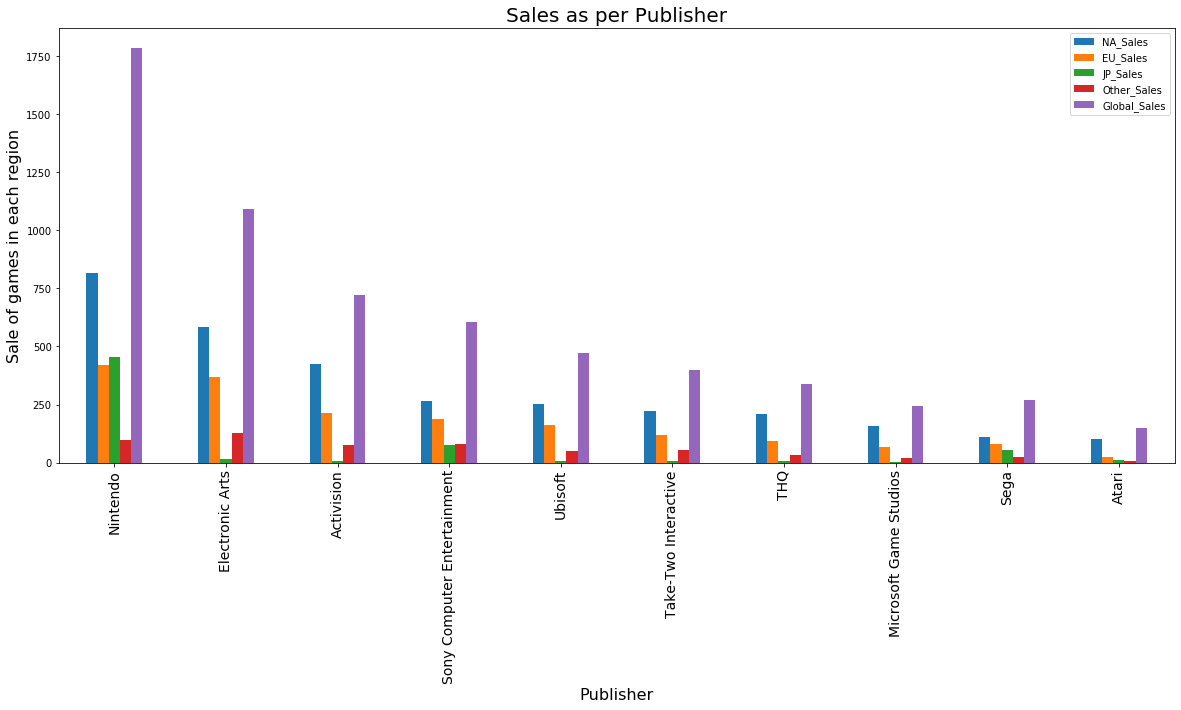

In [130]:
x = pub_pic.iloc[0:10,:]
x.plot(kind='bar',figsize=(20,8),layout='rows')
plt.xlabel('Publisher',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Publisher',fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9],
           ('Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 
            'Take-Two Interactive', 'THQ', 'Microsoft Game Studios', 'Sega', 'Atari'),fontsize=14)

In [131]:
# total sales of each publisher
pub_pic['Sales_sum'] = pub_pic.loc[:,'NA_Sales':'Global_Sales'].apply(lambda x: x.sum(), axis=1)
pub_pic.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_sum
0,Nintendo,815.8,418.3,455.0,95.2,1784.4,3568.7
1,Electronic Arts,584.2,367.4,14.0,127.6,1093.4,2186.6
2,Activision,426.0,213.7,6.5,74.8,721.4,1442.5
3,Sony Computer Entertainment,265.2,187.6,74.1,80.4,607.3,1214.5
4,Ubisoft,252.8,163.0,7.3,50.2,473.5,946.9


In [132]:
#top 10 higest selling publisher 
pub_pic.nlargest(10,['Sales_sum'])

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_sum
0,Nintendo,815.8,418.3,455.0,95.2,1784.4,3568.7
1,Electronic Arts,584.2,367.4,14.0,127.6,1093.4,2186.6
2,Activision,426.0,213.7,6.5,74.8,721.4,1442.5
3,Sony Computer Entertainment,265.2,187.6,74.1,80.4,607.3,1214.5
4,Ubisoft,252.8,163.0,7.3,50.2,473.5,946.9
5,Take-Two Interactive,220.5,118.0,5.8,55.2,399.3,798.8
6,THQ,208.6,94.6,5.0,32.1,340.4,680.8
10,Konami Digital Entertainment,88.9,68.6,90.9,29.9,278.6,556.9
8,Sega,108.8,81.4,56.2,24.3,270.7,541.4
14,Namco Bandai Games,69.4,42.6,126.8,14.6,253.7,507.1


### 3. 哪些游戏平台更受欢迎，各个地区有什么区别？

In [133]:
# select data
plt_sales = vgsales.loc[:,['Platform','EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales']]
plt_sales.head()

,Platform,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,29.0,41.5,3.8,8.5,82.7
1,NES,3.6,29.1,6.8,0.8,40.2
2,Wii,12.9,15.8,3.8,3.3,35.8
3,Wii,11.0,15.8,3.3,3.0,33.0
4,GB,8.9,11.3,10.2,1.0,31.4


In [134]:
plt_pic = plt_sales.groupby(['Platform']).agg(np.sum)
#plt_pic.sort_values(['EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales'], ascending=False).head()
plt_pic.head()

,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,4.9,80.8,0.0,0.8,86.6
3DO,0.0,0.0,0.1,0.0,0.1
3DS,58.3,78.0,97.3,12.5,246.3
DC,1.7,5.4,8.6,0.3,16.0
DS,194.0,388.5,175.0,60.3,818.9


In [135]:
vgsales.Platform.nunique()

31

In [136]:
plt_pic.index.name='Platform'
plt_pic.reset_index(inplace= True)
plt_pic.head()

,Platform,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,4.9,80.8,0.0,0.8,86.6
1,3DO,0.0,0.0,0.1,0.0,0.1
2,3DS,58.3,78.0,97.3,12.5,246.3
3,DC,1.7,5.4,8.6,0.3,16.0
4,DS,194.0,388.5,175.0,60.3,818.9


In [137]:
#plt_pic.sort_values(['EU_Sales'],ascending=False)

Text(0.5, 1, 'Max Sales of Platforms')

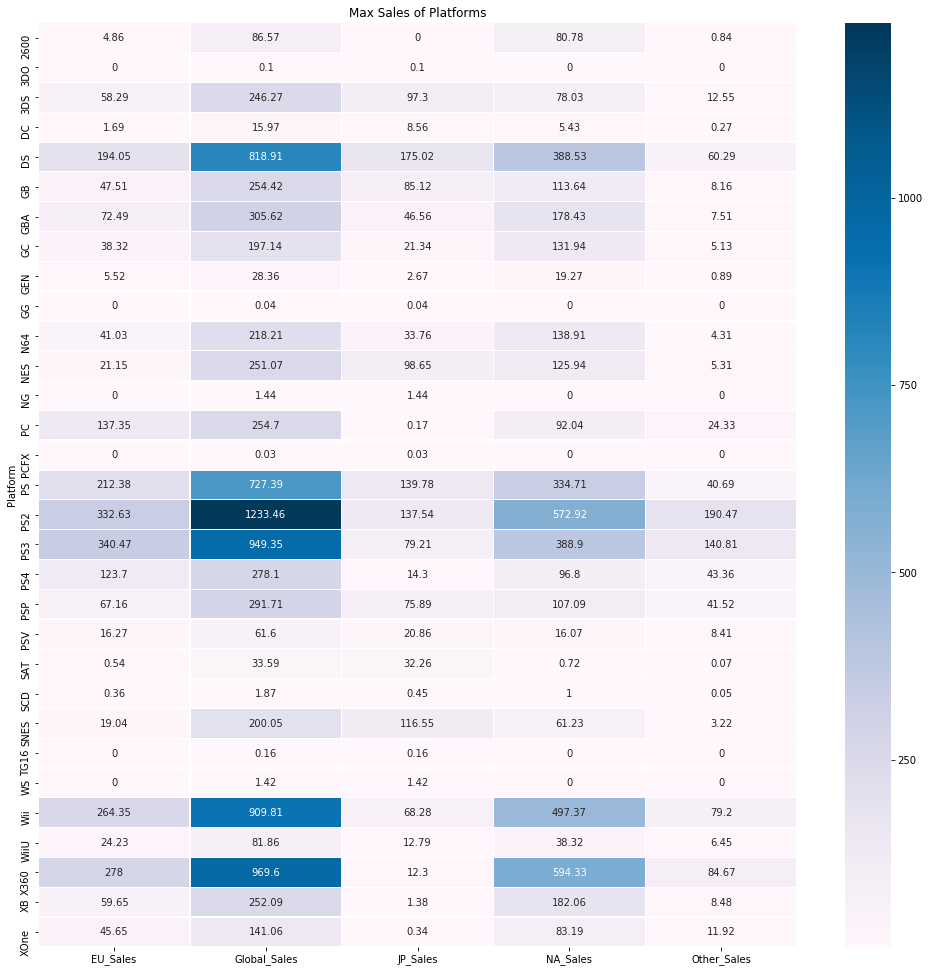

In [138]:
plt_pic = pd.pivot_table(plt_pic,values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
                           index=['Platform'],aggfunc='max',margins=False)

plt.figure(figsize=(17,17))
sns.heatmap(plt_pic,linewidths=.3,annot=True,vmin=0.01,cmap='PuBu',fmt='g')
#plt.gcf().get_major_formatter().set_scientific(False)
plt.title('Max Sales of Platforms')

### 4. 最受欢迎游戏类型

In [101]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.5,29.0,3.8,8.5,82.7
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.1,3.6,6.8,0.8,40.2
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.8,12.9,3.8,3.3,35.8
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.8,11.0,3.3,3.0,33.0
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.3,8.9,10.2,1.0,31.4


In [102]:
genre = vgsales.groupby('Genre',sort=True).agg(np.sum)
genre.drop(['Rank','Year'],axis = 1,inplace=True)

In [103]:
genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.8,516.5,158.7,184.9,1722.8
Adventure,101.9,63.7,52.0,16.7,234.6
Fighting,220.7,100.0,87.2,36.2,444.0
Misc,396.9,211.8,106.7,73.9,789.9
Platform,446.0,200.7,130.7,51.5,829.1
Puzzle,122.0,50.5,56.7,12.5,242.2
Racing,356.9,236.3,56.6,76.7,726.8
Role-Playing,326.5,187.6,350.3,59.4,923.8
Shooter,575.2,310.4,38.2,101.9,1026.2


In [104]:
genre.index.name='Genre'
genre.reset_index(inplace=True)
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.8,516.5,158.7,184.9,1722.8
1,Adventure,101.9,63.7,52.0,16.7,234.6
2,Fighting,220.7,100.0,87.2,36.2,444.0
3,Misc,396.9,211.8,106.7,73.9,789.9
4,Platform,446.0,200.7,130.7,51.5,829.1
5,Puzzle,122.0,50.5,56.7,12.5,242.2
6,Racing,356.9,236.3,56.6,76.7,726.8
7,Role-Playing,326.5,187.6,350.3,59.4,923.8
8,Shooter,575.2,310.4,38.2,101.9,1026.2
9,Simulation,181.8,113.0,63.5,31.4,390.0


([<matplotlib.axis.XTick at 0x1a2643def0>,
 <a list of 12 Text xticklabel objects>)

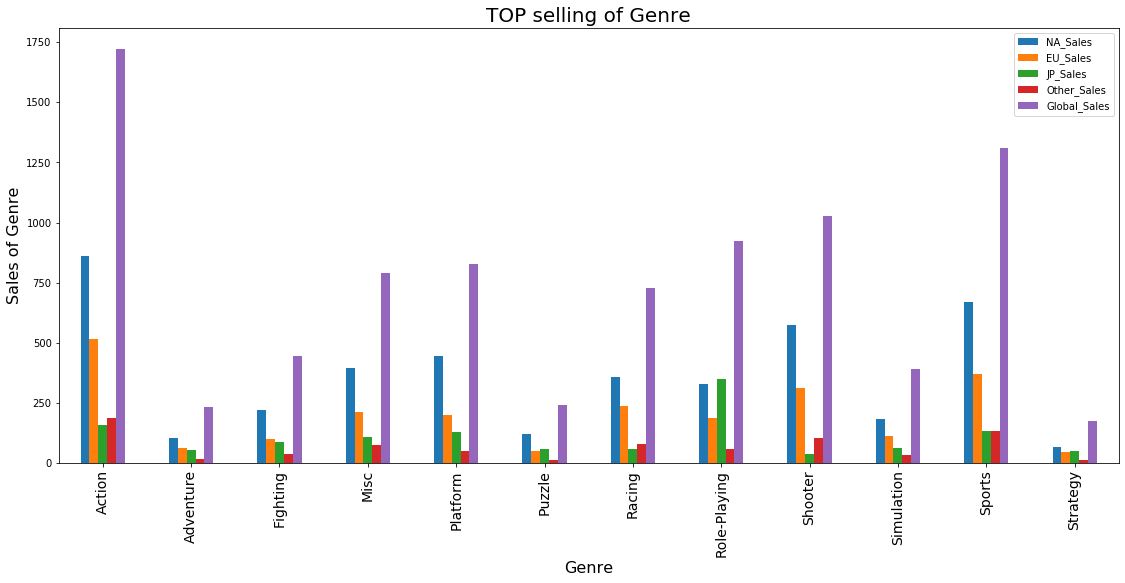

In [105]:
genre.plot(kind='bar',figsize=(19,8),layout='rows')
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sales of Genre',fontsize=16)
plt.title('TOP selling of Genre',fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ('Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 
            'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation','Sports','Strategy'),fontsize=14)

In [106]:
genre['NA_Sales'].sum()

4327.649999999979

In [107]:
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.8,516.5,158.7,184.9,1722.8
1,Adventure,101.9,63.7,52.0,16.7,234.6
2,Fighting,220.7,100.0,87.2,36.2,444.0
3,Misc,396.9,211.8,106.7,73.9,789.9
4,Platform,446.0,200.7,130.7,51.5,829.1
5,Puzzle,122.0,50.5,56.7,12.5,242.2
6,Racing,356.9,236.3,56.6,76.7,726.8
7,Role-Playing,326.5,187.6,350.3,59.4,923.8
8,Shooter,575.2,310.4,38.2,101.9,1026.2
9,Simulation,181.8,113.0,63.5,31.4,390.0


Text(0.5, 1, 'Max Sales of Genre')

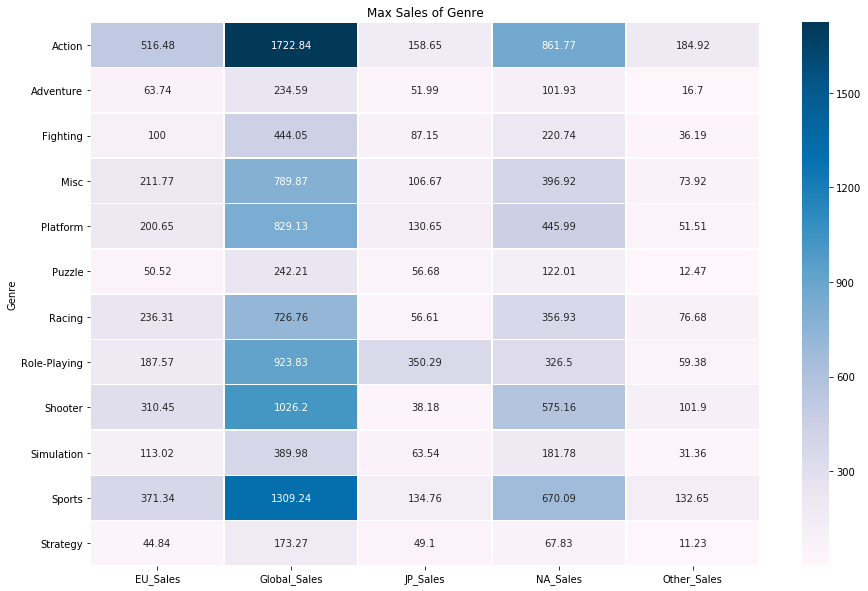

In [108]:
genre_heat = pd.pivot_table(genre,values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
                           index=['Genre'],aggfunc='max',margins=False)

plt.figure(figsize=(15,10))
sns.heatmap(genre_heat,linewidths=.5,annot=True,vmin=0.01,cmap='PuBu',fmt='g')
plt.title('Max Sales of Genre')

In [109]:
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.8,516.5,158.7,184.9,1722.8
1,Adventure,101.9,63.7,52.0,16.7,234.6
2,Fighting,220.7,100.0,87.2,36.2,444.0
3,Misc,396.9,211.8,106.7,73.9,789.9
4,Platform,446.0,200.7,130.7,51.5,829.1
5,Puzzle,122.0,50.5,56.7,12.5,242.2
6,Racing,356.9,236.3,56.6,76.7,726.8
7,Role-Playing,326.5,187.6,350.3,59.4,923.8
8,Shooter,575.2,310.4,38.2,101.9,1026.2
9,Simulation,181.8,113.0,63.5,31.4,390.0


In [219]:
genre_pie = vgsales.groupby('Genre',sort=True).agg(np.sum)
genre_pie.drop(['Rank','Year'],axis = 1,inplace=True)

In [220]:
genre_pie


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.8,516.5,158.7,184.9,1722.8
Adventure,101.9,63.7,52.0,16.7,234.6
Fighting,220.7,100.0,87.2,36.2,444.0
Misc,396.9,211.8,106.7,73.9,789.9
Platform,446.0,200.7,130.7,51.5,829.1
Puzzle,122.0,50.5,56.7,12.5,242.2
Racing,356.9,236.3,56.6,76.7,726.8
Role-Playing,326.5,187.6,350.3,59.4,923.8
Shooter,575.2,310.4,38.2,101.9,1026.2


### 每个地区不同游戏类型的销售占比

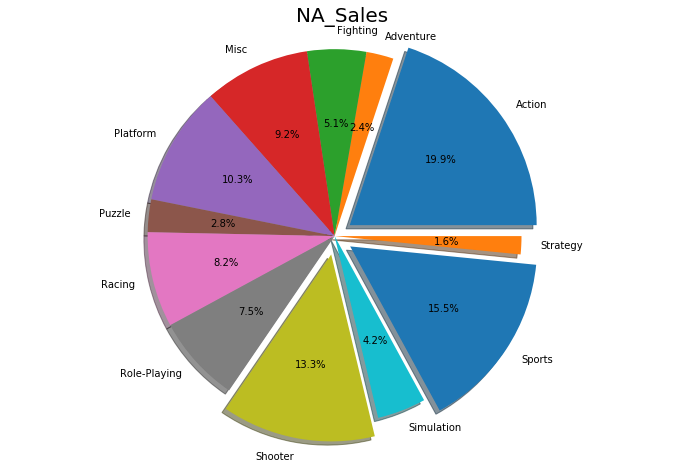

In [221]:
# The percentage of NA_Sales based on genre
fig = plt.figure(figsize=(12,8))
size = genre_pie.NA_Sales
labels = genre_pie.index
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0,0.1,0,0.1,0),shadow=True)
plt.title('NA_Sales',fontsize = 20 )
plt.axis('equal')
plt.show()

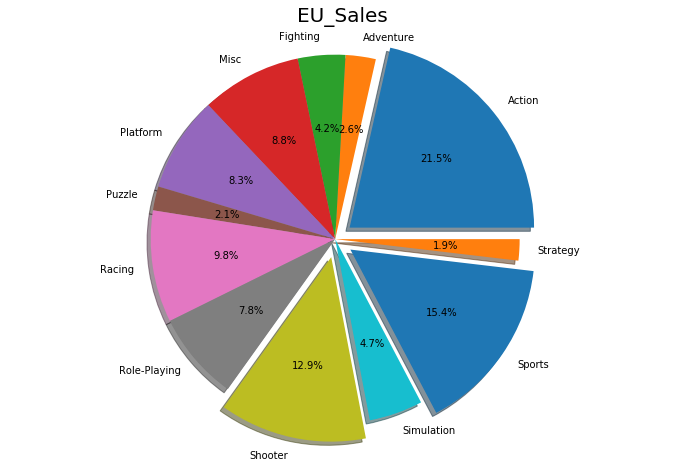

In [223]:
# The percentage of EU_Sales based on genre
fig = plt.figure(figsize=(12,8))
size = genre_pie.EU_Sales
labels = genre_pie.index
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0,0.1,0,0.1,0),shadow=True)
plt.title('EU_Sales',fontsize = 20 )
plt.axis('equal')
plt.show()

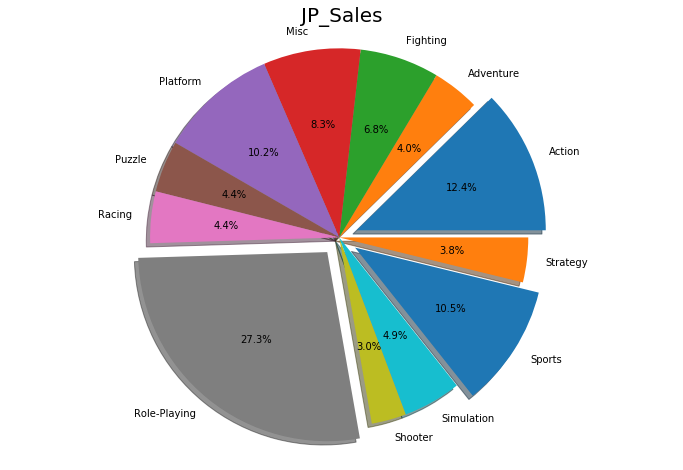

In [225]:
# The percentage of JP_Sales based on genre
fig = plt.figure(figsize=(12,8))
size = genre_pie.JP_Sales
labels = genre_pie.index
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0.1,0,0,0.1,0),shadow=True)
plt.title('JP_Sales',fontsize = 20 )
plt.axis('equal')
plt.show()

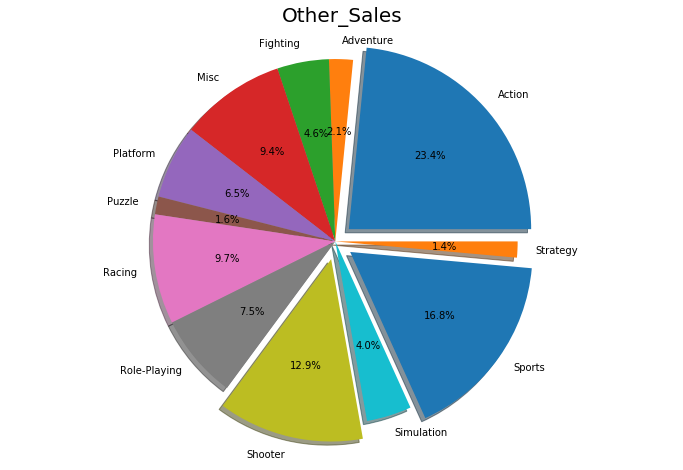

In [227]:
# The percentage of Other_Sales based on genre
fig = plt.figure(figsize=(12,8))
size = genre_pie.Other_Sales
labels = genre_pie.index
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0,0.1,0,0.1,0),shadow=True)
plt.title('Other_Sales',fontsize = 20 )
plt.axis('equal')
plt.show()

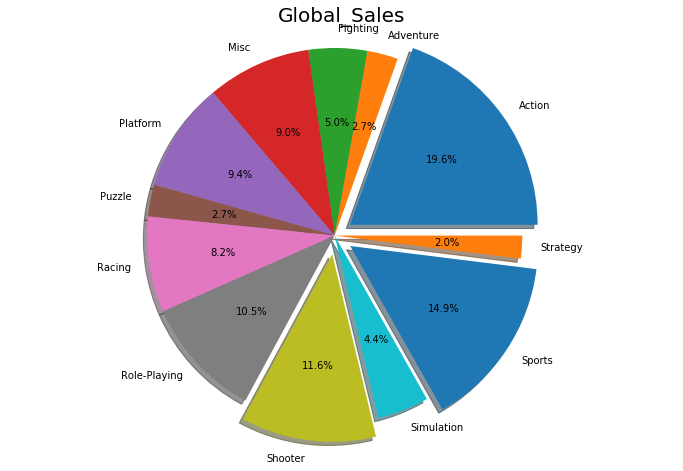

In [228]:
# The percentage of Global_Sales based on genre
fig = plt.figure(figsize=(12,8))
size = genre_pie.Global_Sales
labels = genre_pie.index
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0,0,0.1,0,0.1,0),shadow=True)
plt.title('Global_Sales',fontsize = 20 )
plt.axis('equal')
plt.show()